In [2]:
#https://finance.yahoo.com/quote/MSFT/history/

In [6]:
import pandas as pd
df=pd.read_csv('/content/MSFT (1).csv')

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400
...,...,...,...,...,...,...,...
9616,2024-05-09,410.570007,412.720001,409.100006,412.320007,411.577637,14689700
9617,2024-05-10,412.940002,415.380005,411.799988,414.739990,413.993256,13402300
9618,2024-05-13,418.010010,418.350006,410.820007,413.720001,412.975098,15440200
9619,2024-05-14,412.019989,417.489990,411.549988,416.559998,415.809998,15109300


In [8]:
df=df[['Date','Close']]

In [9]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9616,2024-05-09,412.320007
9617,2024-05-10,414.739990
9618,2024-05-13,413.720001
9619,2024-05-14,416.559998


In [10]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9616    2024-05-09
9617    2024-05-10
9618    2024-05-13
9619    2024-05-14
9620    2024-05-15
Name: Date, Length: 9621, dtype: object

In [11]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
print(datetime_object)


1986-03-19 00:00:00


In [12]:
df['Date']=df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-12-a4c74efbab4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9616   2024-05-09
9617   2024-05-10
9618   2024-05-13
9619   2024-05-14
9620   2024-05-15
Name: Date, Length: 9621, dtype: datetime64[ns]

In [13]:
df.index=df.pop('Date')

In [14]:
df.index

DatetimeIndex(['1986-03-13', '1986-03-14', '1986-03-17', '1986-03-18',
               '1986-03-19', '1986-03-20', '1986-03-21', '1986-03-24',
               '1986-03-25', '1986-03-26',
               ...
               '2024-05-02', '2024-05-03', '2024-05-06', '2024-05-07',
               '2024-05-08', '2024-05-09', '2024-05-10', '2024-05-13',
               '2024-05-14', '2024-05-15'],
              dtype='datetime64[ns]', name='Date', length=9621, freq=None)

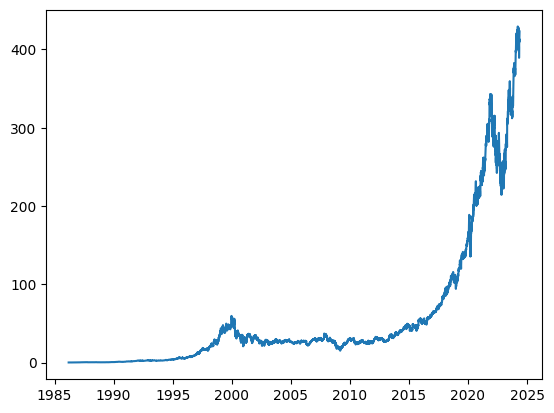

In [15]:
import matplotlib.pyplot as plt
plt.plot(df.index,df['Close'])

In [16]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [17]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

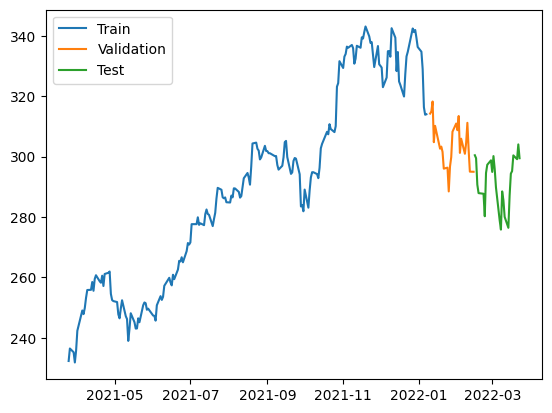

In [18]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
model=Sequential([layers.Input((3,1)),layers.LSTM(64),layers.Dense(32,activation='relu'),layers.Dense(32,activation='relu'),layers.Dense(1)])


In [22]:
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error']) # Corrected 'metrics' spelling
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100) # Corrected 'epoches' to 'epochs'


Epoch 1/100
7/7 [==============================] - 4s 109ms/step - loss: 84541.5391 - mean_absolute_error: 289.0186 - val_loss: 92160.9766 - val_mean_absolute_error: 303.4930
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 84181.2500 - mean_absolute_error: 288.3950 - val_loss: 91736.2266 - val_mean_absolute_error: 302.7924
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 83760.9766 - mean_absolute_error: 287.6631 - val_loss: 91275.8906 - val_mean_absolute_error: 302.0313
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 83304.1328 - mean_absolute_error: 286.8693 - val_loss: 90732.6172 - val_mean_absolute_error: 301.1306
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 82725.8828 - mean_absolute_error: 285.8594 - val_loss: 90027.1797 - val_mean_absolute_error: 299.9570
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 82003.5625 - mean_absolute_error: 284.5929 - val_loss: 89

7/7 [==============================] - 0s 5ms/step


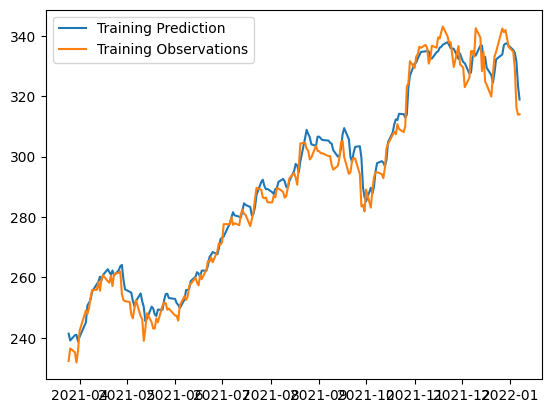

In [24]:
train_predictions = model.predict(X_train).flatten() # Corrected variable name
plt.plot(dates_train, train_predictions) # Corrected variable name
plt.plot(dates_train, y_train)
plt.legend(['Training Prediction', 'Training Observations']) # No need for extra parentheses around the legend labels


1/1 [==============================] - 0s 40ms/step


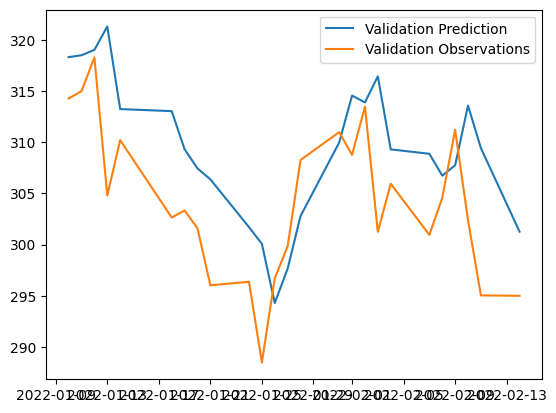

In [25]:
val_predictions = model.predict(X_val).flatten() # Corrected variable name
plt.plot(dates_val, val_predictions) # Corrected variable name
plt.plot(dates_val, y_val)
plt.legend(['Validation Prediction', 'Validation Observations']) # No need for extra parentheses around the legend labels


1/1 [==============================] - 0s 24ms/step


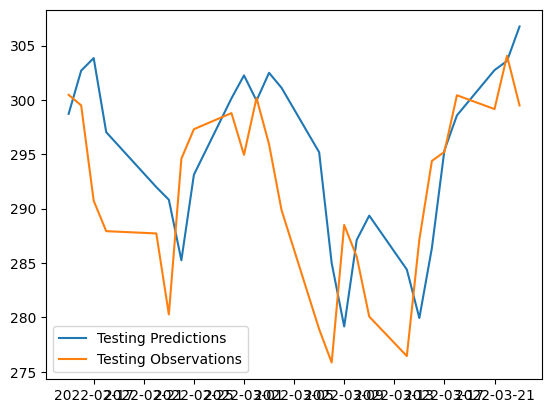

In [26]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

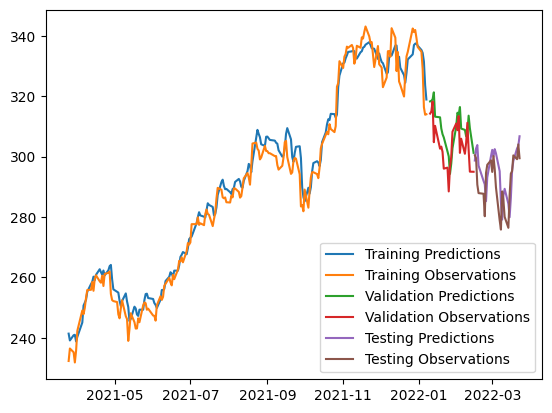

In [27]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [28]:
from copy import deepcopy
recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])
for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 24ms/step


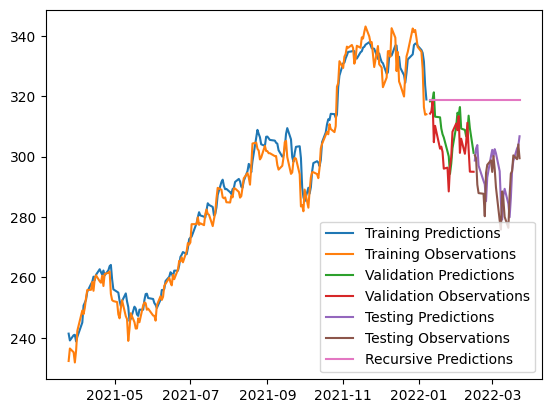

In [29]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])